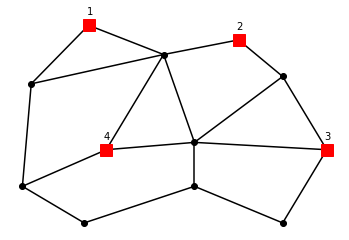

In [5]:
# data for power flow problem
import cvxpy as cp
import numpy as np

n = 12     # total number of nodes
m = 18     # number of edges (transmission lines)
k = 4      # number of generators
# transmission line capacities
Pmax = np.matrix("""
    4.8005,
    1.9246,
    3.4274,
    2.9439,
    4.5652,
    4.0484,
    2.8259,
    1.0740,
    4.2856,
    2.7788,
    3.4617,
    4.1677,
    4.6873,
    3.9528,
    1.7051,
    2.6228,
    4.7419,
    4.6676,
""")
Gmax = np.matrix("3; 2; 4; 7")  # maximum generator power
c    = np.matrix("4; 8; 5; 3")  # supply generator costs
d = np.matrix("""                 
    1.6154
    2.3405
    1.0868
    1.5293
    2.2197
    1.0148
    1.2083
    1.3041
""")# network power demands
# graph incidence matrix
A = np.matrix(""" -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ;
       0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ;
       0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1 ;
       0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 ;
       1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0 ;
       0  1  1  0 -1  0  1 -1  0  0  0  0  0  0  0  0  0  0 ;
       0  0  0  1  0  0  0  0 -1  1  0  0  0  0  0  0  0  0 ;
       0  0  0  0  0  0  0  1  1  0  0  0 -1  0  1  0  0  1 ;
       0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0 ;
       0  0  0  0  0  0  0  0  0  0  0  1  1 -1  0  0  0  0 ;
       0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0 ;
       0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  1  0 
       """)

# the code below is not data for the problem
# it is used only to generate the network graph

# x-y coordinates
# each row is node x-y coordinates
XY = np.matrix("""     
 1.5 5.2;   
 4.9 5;     
 6.9 3.5;   
 1.9 3.5;   
 0.2 4.4;   
 3.2 4.8;   
 5.9 4.5;   
 3.9 3.6;   
 5.9 2.5;   
 3.9 3;     
 1.4 2.5;   
 0 3
 """);    

# node adjacency matrix
Ad = -A@A.T 
Ad = Ad - np.diag(np.diag(Ad))
epsx = 0.05; epsy = 0.15; # text placing offset

# plotting
import matplotlib.pyplot as plt
for i in range(12): #plot edges
    for j in range(i):
        if Ad[i,j] == 1:
            plt.plot((XY[i,0], XY[j,0]), (XY[i,1], XY[j,1]), 'k-')
for j in range(k): #plot nodes
    plt.plot(XY[j,0],XY[j,1],'rs', markersize=12)
    plt.text(XY[j,0]-epsx,XY[j,1]+epsy,str(j+1))      
for j in range(k,n):
    plt.plot(XY[j,0],XY[j,1],'ko')
plt.axis('off')
plt.savefig('pwr_net.png')
if __name__ == '__main__':
    plt.show()